In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import train_test_split

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


In [4]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,4567,44,1.0,36.847630,19.094182,5.0,5,9.0,1970,0.036122,B,B,24,4378,0,1036.0,1,1,B
1,5925,62,1.0,42.493907,42.568133,10.0,7,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A
2,960,27,2.0,59.463678,NaN,9.0,19,19.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B
3,3848,23,3.0,49.646030,33.893825,6.0,2,2.0,1965,0.014073,B,B,2,475,0,NaN,0,0,B
4,746,74,1.0,53.837056,NaN,1.0,8,17.0,1977,0.309479,B,B,35,7715,4,990.0,0,6,B


Посмотрим описание и типы данных тестовой выборки, нарисуем столбчатую диаграмму корелляции

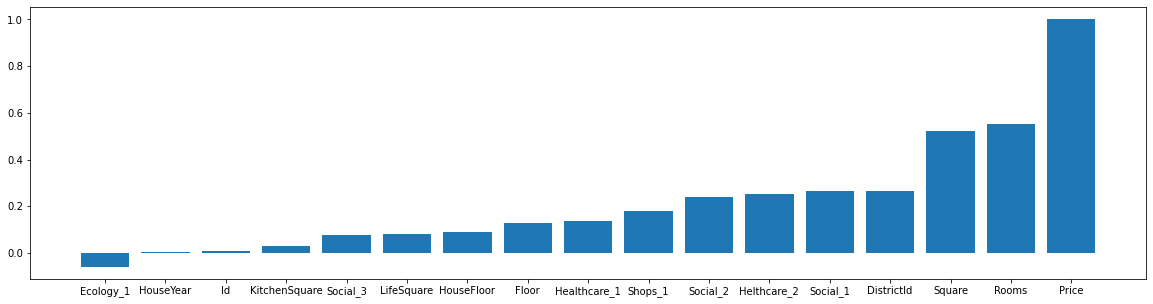

In [5]:
correlation = train_df.corrwith(train_df['Price']).sort_values()
plt.figure(figsize = (20, 5))
plt.bar(correlation.index, correlation)
plt.show()

Цена кореллирует с ценой идеально, остальное тоже выглядит логично, площадью кухни можно пренебречь, в основном корелляция идет с районом проживания и сопутствующими признаками, грустно выглядит корелляция с экологией

In [6]:
train_df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Подозрительно выглядят квартиры без комнат, и с площадами по одному и несколько тысяч метров, 20050000 годом постройки, 117 этажный дом. 50 перцентиль и среднее значение сильно отличаются у года постройки. Также можно выбросить поле индекса как ни на что не влияющее

In [7]:
train_df.drop('Id', axis='columns', inplace=True)

Посмотрим на очевидные неточности где этаж и площадь превышает максимальные, и сделаем усечение чтобы получить крепкую выборку

In [8]:
train_df[train_df['Floor'] > train_df['HouseFloor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
17,8,2.0,49.396000,28.299600,5.0,6,5.0,1962,0.458174,B,A,26,4439,1,1130.0,1,5,B,186971.926566
19,45,1.0,42.367289,40.012529,1.0,16,14.0,2015,0.195781,B,B,23,5212,6,NaN,3,2,B,250466.980777
21,20,3.0,75.611065,47.494621,8.0,11,9.0,1976,0.019509,B,B,37,7687,11,176.0,5,5,B,366916.246494
24,27,1.0,44.203947,NaN,0.0,2,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,135466.559958
25,6,2.0,65.409965,NaN,1.0,18,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,191205.272608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,48,3.0,96.056784,98.152802,1.0,15,1.0,2017,0.041125,B,B,46,9515,5,NaN,1,10,B,524365.550705
9968,1,3.0,86.487550,NaN,1.0,18,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,248248.935528
9970,6,1.0,41.310416,19.117077,9.0,18,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,114878.830713
9975,6,2.0,52.573133,NaN,1.0,18,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,154366.031184


In [9]:
floor_q = train_df["Floor"].quantile(1)
train_df.loc[train_df['Floor'] > train_df['HouseFloor']] = train_df["Floor"].quantile(.95)
train_df[train_df['Floor'] > train_df['HouseFloor']]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


Отлично, повторим с площадями

In [10]:
train_df.loc[train_df['LifeSquare'] > train_df['Square']]  = train_df["LifeSquare"].quantile(.95)
train_df.loc[train_df['HouseYear'] > 2021]  = 2021

Найдем пропущенные значения

In [11]:
train_df.isna().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       1498
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     3602
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

Заполним медианными

In [12]:
train_df['LifeSquare'].fillna(value=train_df['LifeSquare'].median(), inplace=True)
train_df['Healthcare_1'].fillna(value=train_df['Healthcare_1'].median(), inplace=True)
train_df.isna().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [13]:
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,46.518482,7.414982,49.395861,32.004308,10.918882,12.170082,16.813882,1557.464282,6.027880,26.316782,4410.301082,11.980782,611.184982,7.003682,9.322582,168809.871353
std,50.226252,31.085937,35.851443,31.875318,30.805574,30.637426,30.215072,809.167469,31.331257,33.081518,4238.376250,36.303714,826.223672,31.178963,31.030822,120874.277860
min,0.000000,0.000000,16.117154,0.795539,0.000000,1.000000,1.000000,18.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,18.000000,1.000000,36.272827,19.729154,5.000000,5.000000,12.000000,1960.000000,0.037178,18.000000,264.000000,1.000000,75.000000,0.000000,1.000000,95395.422861
50%,27.000000,2.000000,46.738401,28.850043,8.000000,9.000000,17.000000,1977.000000,0.133215,23.000000,4378.000000,3.000000,325.000000,2.000000,5.000000,174133.912536
75%,63.210755,3.000000,63.210755,37.426076,12.000000,17.000000,18.000000,1991.000000,0.371149,35.000000,6746.000000,18.000000,705.000000,5.000000,15.000000,231679.808594
max,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,19083.000000,2021.000000,4849.000000,2021.000000,2021.000000,633233.466570


Усечем квартиры без комнат и с жилой площадью около нуля

In [14]:
train_df.loc[train_df['Rooms'] == 0] = 1
train_df.loc[train_df['LifeSquare'] < 10] = train_df["LifeSquare"].quantile(.5)
train_df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,46.542042,7.730942,49.051798,32.269258,11.235542,12.388042,16.944342,1534.624142,6.360839,26.518142,4377.419842,12.205742,605.993542,7.331542,9.626642,166774.610652
std,50.156358,31.163580,35.816165,31.674589,30.842477,30.682332,30.236970,824.065562,31.419387,33.011319,4247.306089,36.169083,828.028419,31.257976,31.086176,121958.454373
min,0.000000,1.000000,17.414181,10.523868,0.000000,1.000000,1.000000,18.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,18.000000
25%,18.000000,1.000000,35.552108,20.141766,5.000000,5.000000,12.000000,1959.000000,0.037178,18.000000,264.000000,1.000000,63.210755,0.000000,1.000000,88320.114105
50%,27.000000,2.000000,46.314688,28.850043,8.000000,9.000000,17.000000,1977.000000,0.135650,23.000000,4346.000000,3.000000,325.000000,2.000000,5.000000,173187.505781
75%,63.210755,3.000000,63.210755,37.411653,13.000000,18.000000,18.000000,1990.000000,0.437885,35.000000,6714.000000,18.000000,705.000000,5.000000,16.000000,231232.098939
max,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,19083.000000,2021.000000,4849.000000,2021.000000,2021.000000,633233.466570


In [15]:
train_df.dtypes

DistrictId       float64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor            float64
HouseFloor       float64
HouseYear        float64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1         float64
Social_2         float64
Social_3         float64
Healthcare_1     float64
Helthcare_2      float64
Shops_1          float64
Shops_2           object
Price            float64
dtype: object

Дропнем объектные типы

In [16]:
train_df = train_df.select_dtypes(exclude=['object'])
train_df.dtypes

DistrictId       float64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor            float64
HouseFloor       float64
HouseYear        float64
Ecology_1        float64
Social_1         float64
Social_2         float64
Social_3         float64
Healthcare_1     float64
Helthcare_2      float64
Shops_1          float64
Price            float64
dtype: object

Разделим выборку

In [17]:
X=train_df.drop('Price',axis=1)
y = train_df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print('X_train ', X_train.shape)
print('X_test ', X_test.shape)
print('y_train ', y_train.shape)
print('y_test ', y_test.shape)

X_train  (7500, 15)
X_test  (2500, 15)
y_train  (7500,)
y_test  (2500,)


Выберу AdaBoostRegressor потому что разобрался с выбросами

In [18]:
model = AdaBoostRegressor()
model.fit(X_train, y_train)
model.predict(X_test)
model.score(X_test, y_test)

0.7521133890741357

почти 0.8, нужно лучше проводить подготовку данных =(

Теперь уберем все лишние поля и попробуем предсказать цены на тестовом датафрейме

In [19]:
test_df = test_df.select_dtypes(exclude=['object'])
test_df.dtypes

model.predict(test_df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Опять пробелы, заполним медианными значениями с помощью импьютера

In [20]:
from sklearn.impute import SimpleImputer

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
test_df_imp =pd.DataFrame(imp_median.fit_transform(test_df))
test_df_imp.columns = test_df.columns
test_df_imp.drop('Id', axis='columns', inplace=True)

In [23]:
result = pd.read_csv('sample_submission.csv')
result['PricePredicted'] = model.predict(test_df_imp)
result

,Id,Price,PricePredicted
0,4567,200000.0,180634.393464
1,5925,200000.0,174621.440994
2,960,200000.0,193033.675087
3,3848,200000.0,174621.440994
4,746,200000.0,190150.191219
...,...,...,...
4995,10379,200000.0,188977.261853
4996,16138,200000.0,316177.864898
4997,3912,200000.0,187917.199907
4998,5722,200000.0,190502.384134
